In [24]:
import pandas as pd #untuk manipulasi dan analisis data.
import numpy as np #untuk operasi numerik.
import sklearn #adalah library untuk machine learning.
from scipy import stats #digunakan untuk fungsi ilmiah dan teknik.
import matplotlib.pyplot as plt #untuk visualisasi data.
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #untuk mengubah variabel kategorikal menjadi numerik.
from sklearn.utils import resample #untuk melakukan penyeimbangan data jika diperlukan (misalnya, oversampling atau undersampling).
from sklearn import metrics #untuk evaluasi kinerja model.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay #untuk evaluasi kinerja model.
from sklearn.model_selection import train_test_split #untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score #untuk metrik evaluasi lainnya.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #untuk mengimpor algoritma Random Forest.
import itertools #untuk operasi iteratif yang efisien.
import warnings #ntuk mengatur peringatan (misalnya, mengabaikan peringatan agar output lebih bersih).
warnings.filterwarnings("ignore")
from sklearn import preprocessing #digunakan untuk mengimpor modul preprocessing dari scikit-learn

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [27]:
df.head(22)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [28]:
df.shape #digunakan untuk mengetahui dimensi dari DataFrame

(5110, 12)

In [29]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [31]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
convert_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

for column in convert_columns:
    df[column] = df[column].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


In [35]:
df[df.duplicated(subset=['id'],keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [36]:
df.drop(['id'],axis=1,inplace=True)

In [37]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


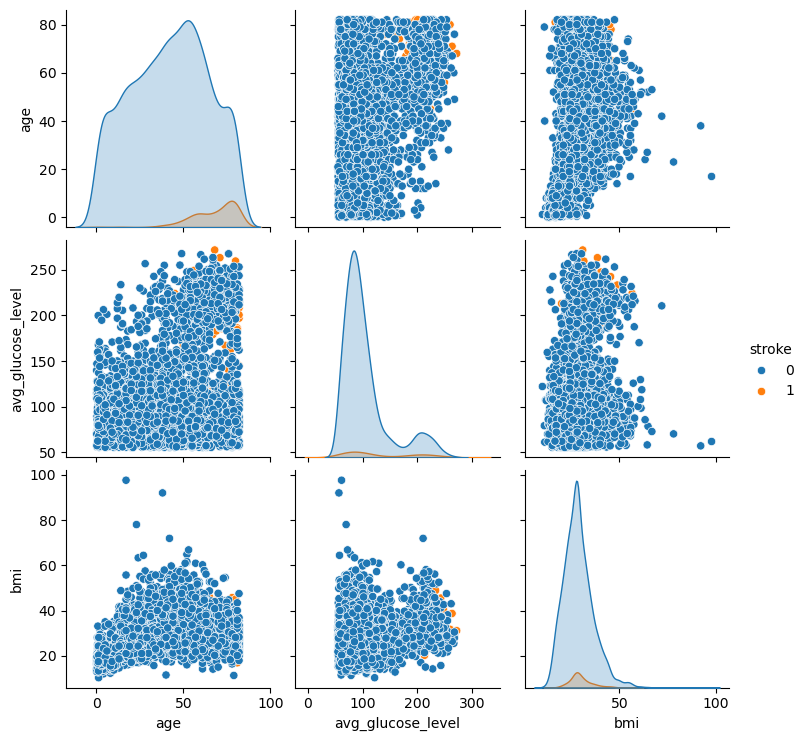

In [38]:
sns.pairplot(df,vars = ['age','avg_glucose_level','bmi'],hue='stroke')
plt.show()

In [39]:
df['stroke'].value_counts().to_frame() #Metode ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'stroke'

,count
stroke,
0,4861
1,249


In [40]:
stroke_majority=df[df['stroke']==0]
stroke_minority=df[df['stroke']==1]

In [41]:
stroke_minority_oversample=resample(stroke_minority,n_samples=4861,replace=True,random_state=42)

In [42]:
stroke_df=pd.concat([stroke_minority_oversample,stroke_majority])

In [43]:
stroke_df['stroke'].value_counts().to_frame()

,count
stroke,
0,4861
1,4861


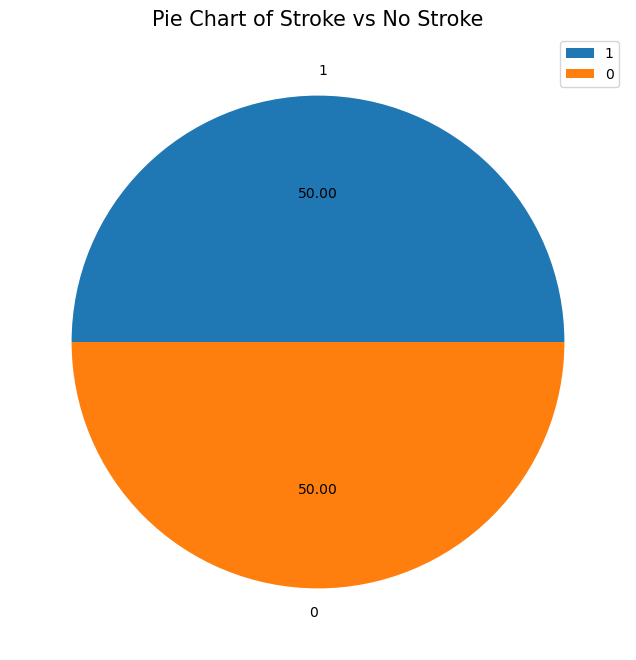

In [44]:
has_stroke = stroke_df.loc[df['stroke']==1,'stroke'].count()
no_stroke = stroke_df.loc[df['stroke']==0,'stroke'].count()
label=['1','0']
fig = plt.figure(figsize = (12,8))
patches = plt.pie([has_stroke,no_stroke], labels=label,autopct='%.2f')
plt.legend(label)
plt.title('Pie Chart of Stroke vs No Stroke', fontsize=15)
plt.show()

In [45]:
categories=["gender","ever_married","work_type","Residence_type","smoking_status"]
LE=LabelEncoder()
for i in categories:
    stroke_df[i]=LE.fit_transform(stroke_df[i])

In [46]:
display(stroke_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
102,0,74.0,0,0,1,2,0,231.61,34.6,1,1
179,1,81.0,0,0,1,2,1,213.22,26.1,0,1
92,0,57.0,0,0,0,3,1,68.02,37.5,2,1
14,0,79.0,0,1,1,2,1,214.09,28.2,2,1
106,0,50.0,1,0,1,2,0,73.18,30.3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [47]:
X=stroke_df.drop(['stroke'],axis=1)
y=stroke_df['stroke']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

In [49]:
from sklearn.model_selection import train_test_split

# Misalkan X dan y adalah dataset Anda
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

# Verifikasi ukuran data yang dibagi
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set: X_train = (8749, 10), y_train = (8749,)
Test set: X_test = (973, 10), y_test = (973,)


In [50]:
X_train.shape,X_test.shape #Untuk mengetahui dimensi dari X_train dan X_test, Anda dapat menggunakan

((8749, 10), (973, 10))

In [51]:
forest = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 1, min_samples_split= 5,n_estimators=500)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=500)

In [52]:
y_pred = forest.predict(X_test)

In [53]:
rand_score=accuracy_score(y_test, y_pred)
RAnd_F1_SCORE=f1_score(y_test, y_pred, average='weighted')
print('F1_score:%.4f'%RAnd_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.9979
Accuracy: 0.997945


In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       509

    accuracy                           1.00       973
   macro avg       1.00      1.00      1.00       973
weighted avg       1.00      1.00      1.00       973



Confusion matrix, without normalization
[[464   2]
 [  0 507]]


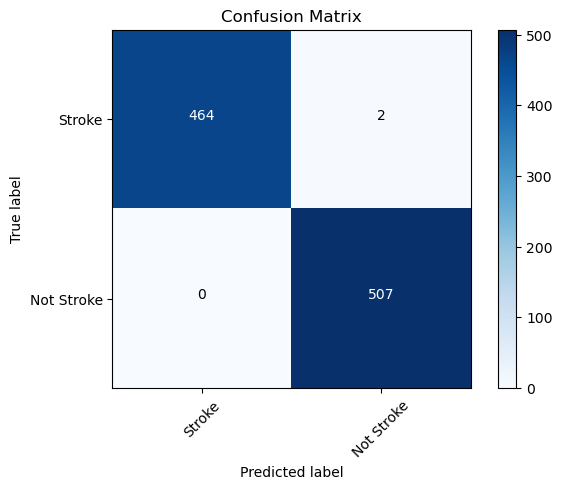

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Stroke', 'Not Stroke']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

In [59]:
import pickle
import gzip

In [61]:
with gzip.open("data_compressed.sav", "wb") as file:
    pickle.dump(forest, file)